In [1]:
%matplotlib inline
from pylab import *

In [2]:
from deficit_defs import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-15.3-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_scale2.asdf


In [3]:
strong_i=1
weak_i=0

In [4]:
base='sims/2024-06-10'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
noise_mat=linspace(0,2,21)
v=np.flip(linspace(0.3,1,len(noise_mat)))

noise_mat

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

## RS

In [6]:
from collections import namedtuple
params = namedtuple('params', 
                    ['count', 'noise1','noise2',
                     'blur1','blur2','number_of_neurons',
                     'scale1','scale2',
                     'sfname','mu_c','sigma_c'])
all_params=[]
count=0

number_of_neurons=20
noise_mat=linspace(0,2,11)
sigma_c=0
blur_mat=linspace(-1,13,15)

for noise_count,noise in enumerate(noise_mat):
    all_params.append(params(count=count,

         noise1=0.1,
         noise2=noise,

         blur1=-1,
         blur2=-1,
         scale1=1,
         scale2=0,
         mu_c=0,
         sigma_c=0,
         number_of_neurons=number_of_neurons,

        sfname=f'{base}/rs %d neurons dog %d.asdf' % 
                 (number_of_neurons,noise_count),
                ))
        
    count+=1
        
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)

print(len(all_params))


params(count=0, noise1=0.1, noise2=0.0, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=0, sfname='sims/2024-06-10/rs 20 neurons dog 0.asdf', mu_c=0, sigma_c=0)
params(count=1, noise1=0.1, noise2=0.2, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=0, sfname='sims/2024-06-10/rs 20 neurons dog 1.asdf', mu_c=0, sigma_c=0)
params(count=2, noise1=0.1, noise2=0.4, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=0, sfname='sims/2024-06-10/rs 20 neurons dog 2.asdf', mu_c=0, sigma_c=0)
params(count=3, noise1=0.1, noise2=0.6000000000000001, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=0, sfname='sims/2024-06-10/rs 20 neurons dog 3.asdf', mu_c=0, sigma_c=0)
params(count=4, noise1=0.1, noise2=0.8, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=0, sfname='sims/2024-06-10/rs 20 neurons dog 4.asdf', mu_c=0, sigma_c=0)
[....]
params(count=6, noise1=0.1, noise2=1.2000000000000002, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=0, s

In [7]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Text(0.5, 1.0, '$\\sigma_{\\mathrm{noise}}$')

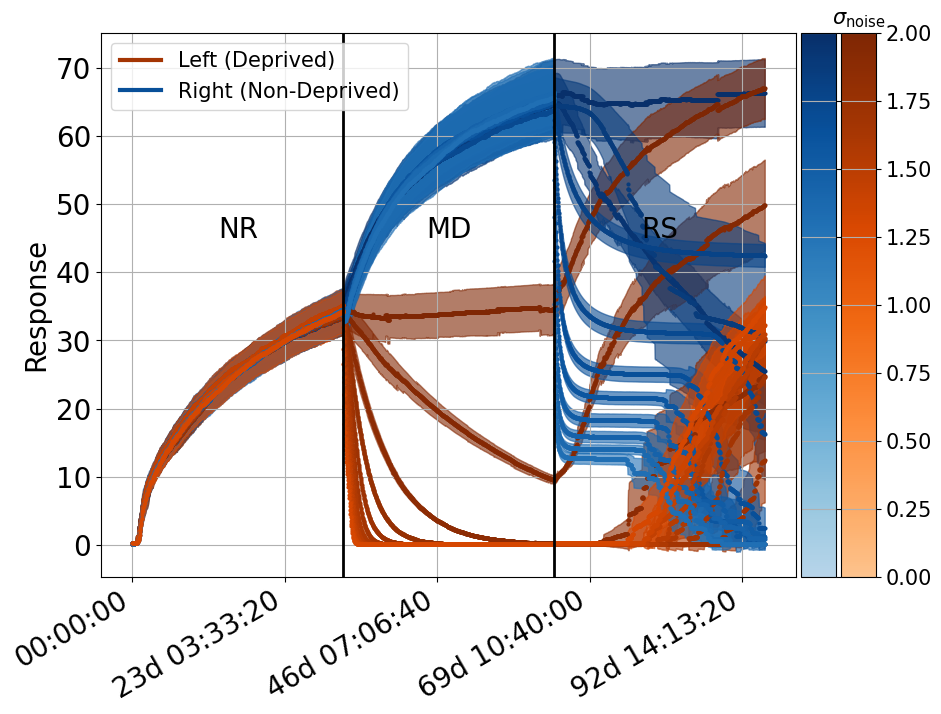

In [8]:
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    R=RR[params.sfname]
    μ=R.y.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.y.std(axis=1)
    N=R.y.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)
    
    fill_between(R.t,μ[:,strong_i]-2*σ[:,strong_i],μ[:,strong_i]+2*σ[:,strong_i],color=Blues2(v[idx]),alpha=.6)
    plot(R.t,μ[:,strong_i],'o',markersize=2,color=Blues2(v[idx]))
    
    fill_between(R.t,μ[:,weak_i]-2*σ[:,weak_i],μ[:,weak_i]+2*σ[:,weak_i],color=Oranges2(v[idx]),alpha=.6)
    plot(R.t,μ[:,weak_i],'o',markersize=2,color=Oranges2(v[idx]))
    
    
    # errorbar(R.t,μ[:,strong_i],yerr=σ[:,strong_i],fmt='o',markersize=1,color=Blues2(v[idx]),
    #          lw=0.2,ecolor='k',label=f"Right {params.noise1:.1f}")
    # errorbar(R.t,μ[:,weak_i],yerr=σ[:,weak_i],fmt='o',markersize=1,color=Oranges2(v[idx]),
    #          lw=0.2,ecolor='k',label=f"Left {params.noise1:.1f}")
    
    
ylabel('Response')
reformat_time_axis()

#ylim([0,60])

plot([0],[0],'-',color=Oranges2(v[5]),label='Left (Deprived)')
plot([0],[0],'-',color=Blues2(v[5]),label='Right (Non-Deprived)')
legend(fontsize=15,loc='upper left')

axvline(x=R.sequence_times[0][-1],color='black', ls='-',lw=2)
axvline(x=R.sequence_times[1][-1],color='black', ls='-',lw=2)
text(mean(R.sequence_times[0]),45,'NR',ha='center')
text(mean(R.sequence_times[1]),45,'MD',ha='center')
text(mean(R.sequence_times[2]),45,'RS',ha='center')



divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,
                                norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),
                                orientation='vertical')
ax_cb.tick_params(axis='y', which='major', labelsize=15)
ax_cb.grid(True)
ax_cb.set_yticklabels([])

ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,
                                norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),
                                orientation='vertical')
ax_cb2.tick_params(axis='y', which='major', labelsize=15)
ax_cb2.grid(True)


plt.gcf().add_axes(ax_cb)
plt.gcf().add_axes(ax_cb2)



title(r'$\sigma_{\mathrm{noise}}$',fontsize=15)



  0%|          | 0/11 [00:00<?, ?it/s]

<Axes: >

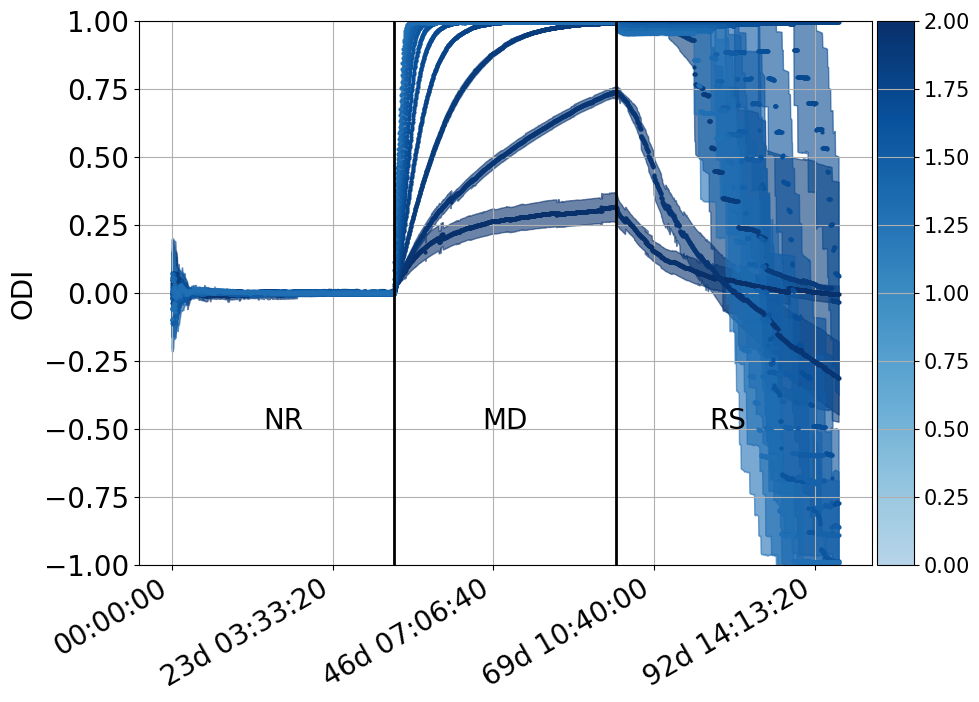

In [9]:
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    
    R=RR[params.sfname]
    μ=R.ODI.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.ODI.std(axis=1)
    N=R.ODI.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)
    fill_between(R.t,μ-2*σ,μ+2*σ,color=Blues2(v[idx]),alpha=.6)
    plot(R.t,μ,'o',markersize=2,color=Blues2(v[idx]))
    
#    errorbar(R.t,μ,yerr=σ,fmt='o',markersize=5,color=Blues2(v[idx]),lw=0.1,ecolor='k',label=f"{params.noise2:.1f}")

reformat_time_axis()
axvline(x=R.sequence_times[0][-1],color='black', ls='-',lw=2)
axvline(x=R.sequence_times[1][-1],color='black', ls='-',lw=2)
text(mean(R.sequence_times[0]),-.5,'NR',ha='center')
text(mean(R.sequence_times[1]),-.5,'MD',ha='center')
text(mean(R.sequence_times[2]),-.5,'RS',ha='center')


ylabel('ODI')
ylim([-1,1])

reformat_time_axis()
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,
                                norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),
                                orientation='vertical')
ax_cb.tick_params(axis='y', which='major', labelsize=15)
ax_cb.grid(True)
plt.gcf().add_axes(ax_cb)




### measure ODI to 0.0 time

In [10]:
t2=R.sequence_times[1][-1]
t2

5529600.202574921

In [11]:
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    
    R=RR[params.sfname]
    μ=R.ODI.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.ODI.std(axis=1)
    N=R.ODI.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)


  0%|          | 0/11 [00:00<?, ?it/s]

In [12]:
len(μ),len(R.t)

(2307, 2307)

In [13]:
idx=where(R.t>=t2)[0]
t=R.t[idx]-t2
μ=μ[idx]

idx=where(μ<=0)[0][0]

μ[idx]

-0.1040423021721725

In [14]:
t[idx]/60/60/24

17.666668968132527

  0%|          | 0/11 [00:00<?, ?it/s]

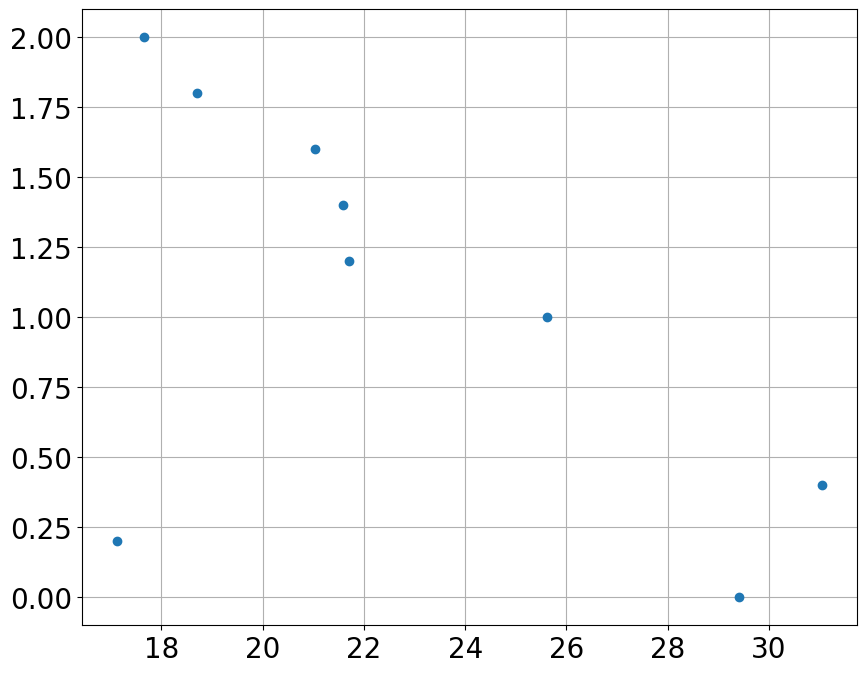

In [15]:
_S=Storage()
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    
    R=RR[params.sfname]
    μ=R.ODI.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.ODI.std(axis=1)
    N=R.ODI.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)

    idx=where(R.t>=t2)[0]
    t=R.t[idx]-t2
    μ=μ[idx]

    try:
        idx=where(μ<=0)[0][0]
    except IndexError:
        continue

    _S+=params.noise2,t[idx]/60/60/24

noise,t=_S.arrays()
noise_RS,t_RS=noise,t
plot(t,noise,'o')

In [16]:
params.noise2

2.0

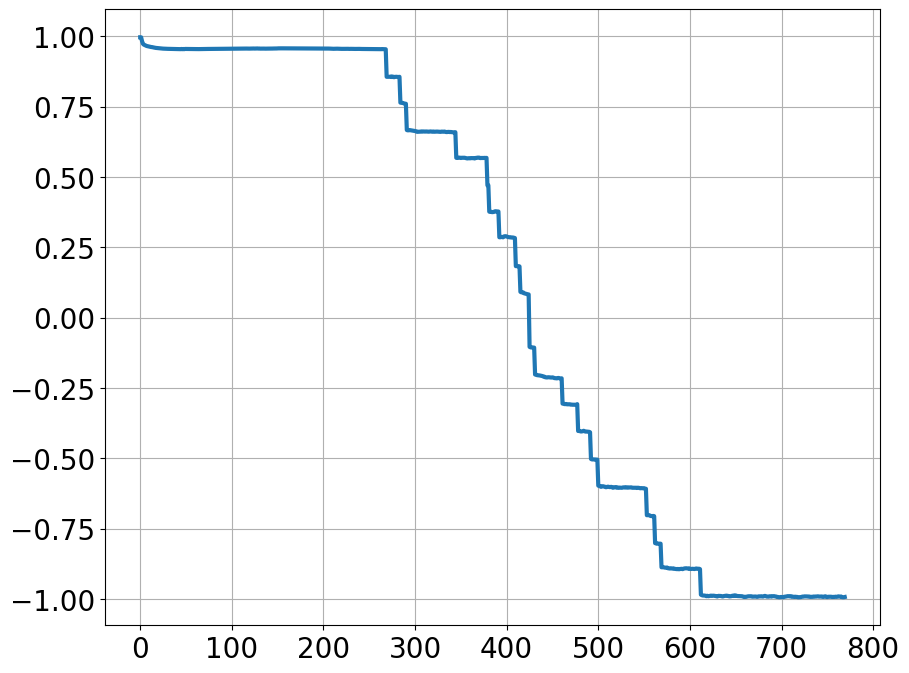

In [17]:
plot(μ)

## BR

In [18]:
from collections import namedtuple
params = namedtuple('params', 
                    ['count', 'noise1','noise2',
                     'blur1','blur2','number_of_neurons',
                     'scale1','scale2',
                     'sfname','mu_c','sigma_c'])
all_params=[]
count=0

number_of_neurons=20
noise_mat=linspace(0,2,11)
sigma_c=0
blur_mat=linspace(-1,13,15)

for noise_count,noise in enumerate(noise_mat):
    all_params.append(params(count=count,

         noise1=0.1,
         noise2=noise,

         blur1=-1,
         blur2=-1,
         scale1=1,
         scale2=1,
         mu_c=0,
         sigma_c=0,
         number_of_neurons=number_of_neurons,

        sfname=f'{base}/br %d neurons dog %d.asdf' % 
                 (number_of_neurons,noise_count),
                ))
        
    count+=1
        
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)

print(len(all_params))


params(count=0, noise1=0.1, noise2=0.0, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=1, sfname='sims/2024-06-10/br 20 neurons dog 0.asdf', mu_c=0, sigma_c=0)
params(count=1, noise1=0.1, noise2=0.2, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=1, sfname='sims/2024-06-10/br 20 neurons dog 1.asdf', mu_c=0, sigma_c=0)
params(count=2, noise1=0.1, noise2=0.4, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=1, sfname='sims/2024-06-10/br 20 neurons dog 2.asdf', mu_c=0, sigma_c=0)
params(count=3, noise1=0.1, noise2=0.6000000000000001, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=1, sfname='sims/2024-06-10/br 20 neurons dog 3.asdf', mu_c=0, sigma_c=0)
params(count=4, noise1=0.1, noise2=0.8, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=1, sfname='sims/2024-06-10/br 20 neurons dog 4.asdf', mu_c=0, sigma_c=0)
[....]
params(count=6, noise1=0.1, noise2=1.2000000000000002, blur1=-1, blur2=-1, number_of_neurons=20, scale1=1, scale2=1, s

In [19]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Text(0.5, 1.0, '$\\sigma_{\\mathrm{noise}}$')

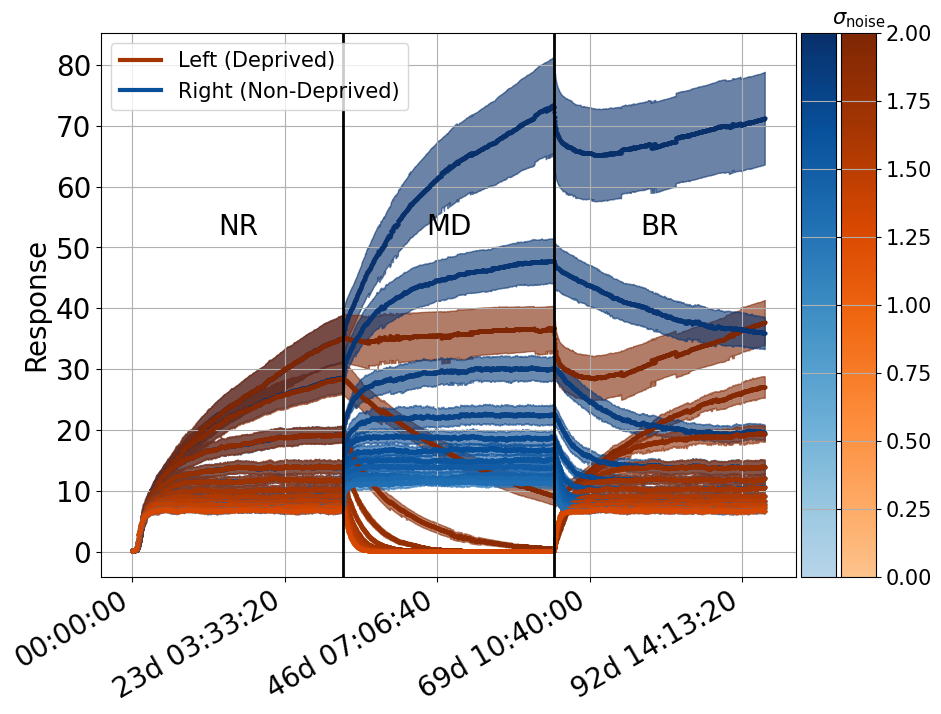

In [20]:
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    R=RR[params.sfname]
    μ=R.y.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.y.std(axis=1)
    N=R.y.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)
    
    fill_between(R.t,μ[:,strong_i]-2*σ[:,strong_i],μ[:,strong_i]+2*σ[:,strong_i],color=Blues2(v[idx]),alpha=.6)
    plot(R.t,μ[:,strong_i],'o',markersize=2,color=Blues2(v[idx]))
    
    fill_between(R.t,μ[:,weak_i]-2*σ[:,weak_i],μ[:,weak_i]+2*σ[:,weak_i],color=Oranges2(v[idx]),alpha=.6)
    plot(R.t,μ[:,weak_i],'o',markersize=2,color=Oranges2(v[idx]))
    
    
    # errorbar(R.t,μ[:,strong_i],yerr=σ[:,strong_i],fmt='o',markersize=1,color=Blues2(v[idx]),
    #          lw=0.2,ecolor='k',label=f"Right {params.noise1:.1f}")
    # errorbar(R.t,μ[:,weak_i],yerr=σ[:,weak_i],fmt='o',markersize=1,color=Oranges2(v[idx]),
    #          lw=0.2,ecolor='k',label=f"Left {params.noise1:.1f}")
    
    
ylabel('Response')
reformat_time_axis()


plot([0],[0],'-',color=Oranges2(v[5]),label='Left (Deprived)')
plot([0],[0],'-',color=Blues2(v[5]),label='Right (Non-Deprived)')
legend(fontsize=15,loc='upper left')

axvline(x=R.sequence_times[0][-1],color='black', ls='-',lw=2)
axvline(x=R.sequence_times[1][-1],color='black', ls='-',lw=2)
text(mean(R.sequence_times[0]),52,'NR',ha='center')
text(mean(R.sequence_times[1]),52,'MD',ha='center')
text(mean(R.sequence_times[2]),52,'BR',ha='center')


divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,
                                norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),
                                orientation='vertical')
ax_cb.tick_params(axis='y', which='major', labelsize=15)
ax_cb.grid(True)
ax_cb.set_yticklabels([])

ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,
                                norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),
                                orientation='vertical')
ax_cb2.tick_params(axis='y', which='major', labelsize=15)
ax_cb2.grid(True)


plt.gcf().add_axes(ax_cb)
plt.gcf().add_axes(ax_cb2)



title(r'$\sigma_{\mathrm{noise}}$',fontsize=15)



  0%|          | 0/11 [00:00<?, ?it/s]

Text(0.5, 1.0, '$\\sigma_{\\mathrm{noise}}$')

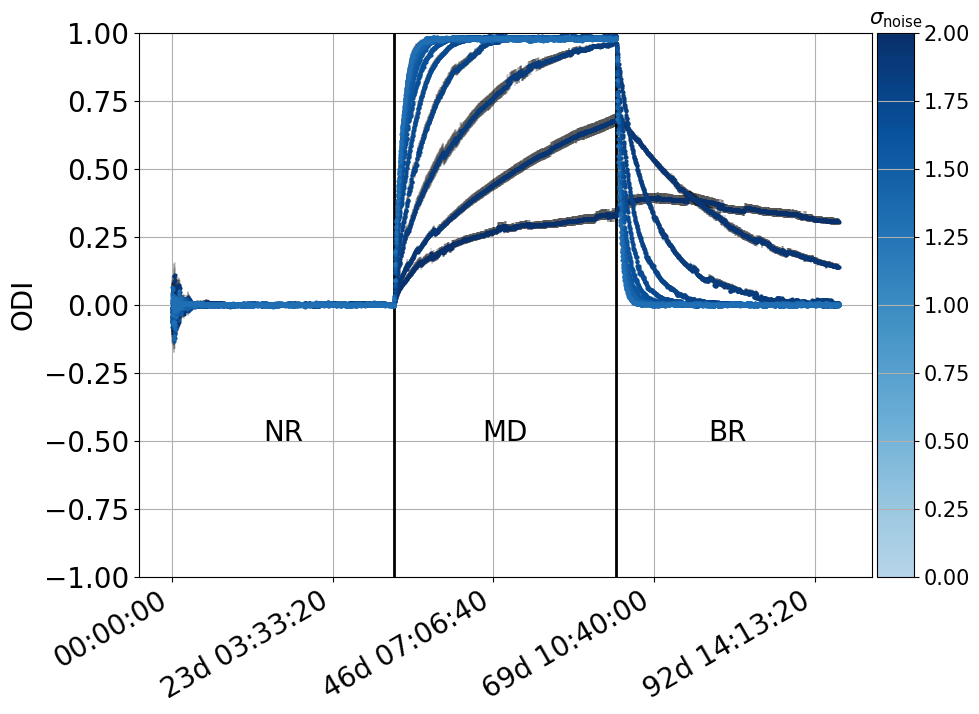

In [21]:
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    
    
    
    R=RR[params.sfname]
    μ=R.ODI.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.ODI.std(axis=1)
    N=R.ODI.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)
    errorbar(R.t,μ,yerr=σ,fmt='o',markersize=2,color=Blues2(v[idx]),lw=0.2,ecolor='k',label=f"{params.noise2:.1f}")

reformat_time_axis()

axvline(x=R.sequence_times[0][-1],color='black', ls='-',lw=2)
axvline(x=R.sequence_times[1][-1],color='black', ls='-',lw=2)
text(mean(R.sequence_times[0]),-0.5,'NR',ha='center')
text(mean(R.sequence_times[1]),-0.5,'MD',ha='center')
text(mean(R.sequence_times[2]),-0.5,'BR',ha='center')


ylabel('ODI')
ylim([-1,1])

reformat_time_axis()
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,
                                norm=mpl.colors.Normalize(vmin=noise_mat[0], vmax=noise_mat[-1]),
                                orientation='vertical')
ax_cb.tick_params(axis='y', which='major', labelsize=15)
ax_cb.grid(True)
plt.gcf().add_axes(ax_cb)

title(r'$\sigma_{\mathrm{noise}}$',fontsize=15)


  0%|          | 0/11 [00:00<?, ?it/s]

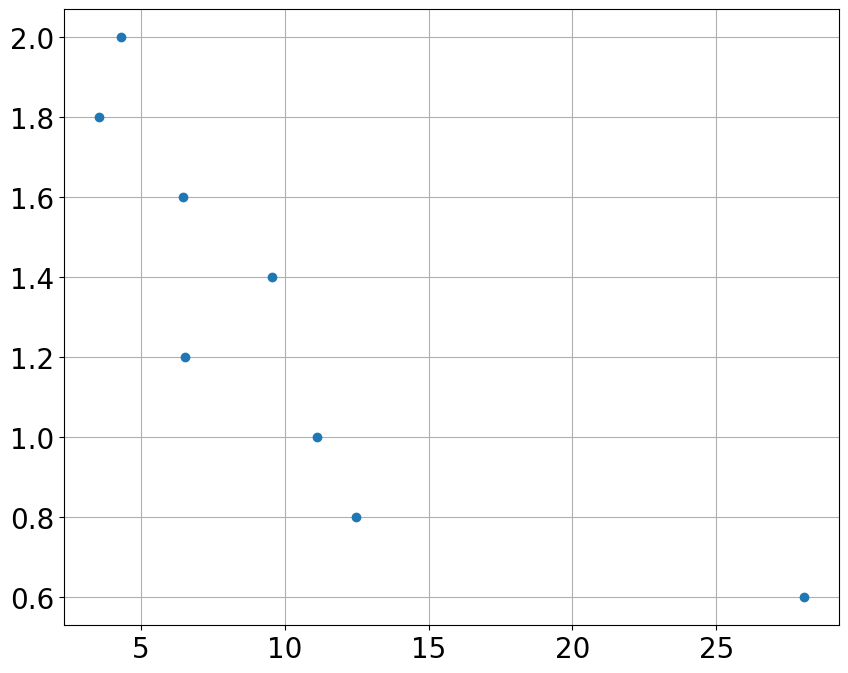

In [22]:
_S=Storage()
for params in tqdm(all_params):
    idx=where(noise_mat==params.noise2)[0][0]
    
    R=RR[params.sfname]
    μ=R.ODI.mean(axis=1)  # average across neurons, at the end of a seq, for each channel
    S=R.ODI.std(axis=1)
    N=R.ODI.shape[1]
    K=1+20/N**2
    σ=K*S/np.sqrt(N)

    idx=where(R.t>=t2)[0]
    t=R.t[idx]-t2
    μ=μ[idx]

    try:
        idx=where(μ<=0)[0][0]
    except IndexError:
        continue

    _S+=params.noise2,t[idx]/60/60/24

noise,t=_S.arrays()
noise_BR,t_BR=noise,t
plot(t,noise,'o')

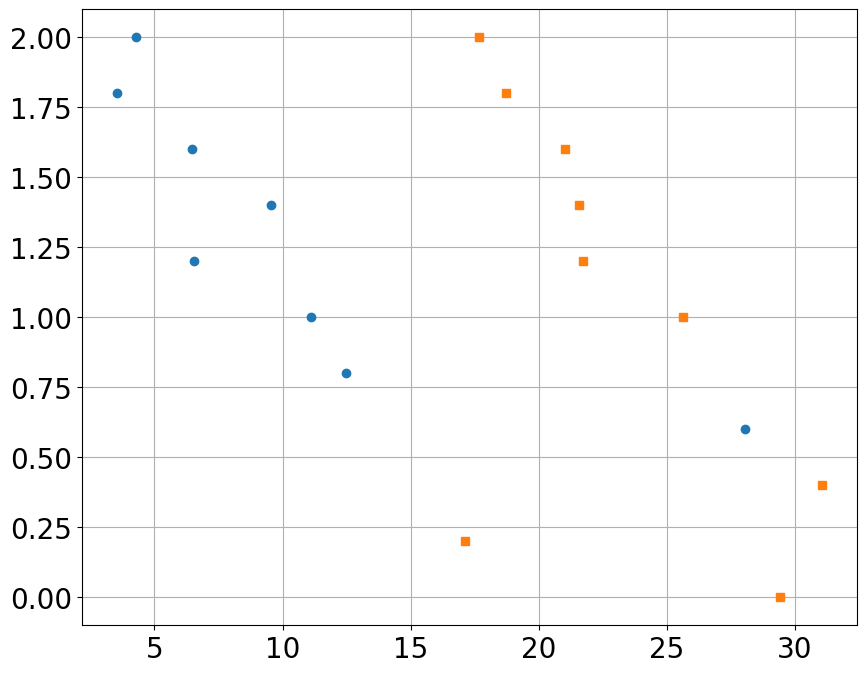

In [23]:
plot(t_BR,noise_BR,'o')
plot(t_RS,noise_RS,'s')